In [5]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [6]:

data = pd.read_csv('group6_data_f.csv')
data.head()

,Earthquake_Magnitude,Strike_(deg),Dip_(deg),Rake_Angle_(deg),Fault_Rupture_Width_(km),Fault_Rupture_Length_for_Calculation_of_Ry_(km),Depth_to_Top_Of_Fault_Rupture_Model,Fault_Rupture_Area_(km^2),Hypocenter_Depth_(km),EpiD_(km),HypD_(km),Joyner-Boore_Dist_(km),Vs30_(m/s)_selected_for_analysis,NEHRP_Classification_from_CGS_map,PGA_(g),PGV_(cm/sec),PGD_(cm),Theta.D_(deg)
0,6.0,268.0,75.0,160.0,4.2,16.2,1.974,68.1,6.0,6.31,8.71,2.07,593.35,C,0.0991,8.750,3.7800,29.94
1,6.0,268.0,75.0,160.0,7.9,15.3,2.039,120.0,6.0,6.31,8.71,2.09,551.82,B,0.0128,0.271,0.0274,29.94
2,5.8,196.2,90.0,0.0,8.3,8.9,6.449,74.3,10.0,73.49,74.17,71.28,219.31,D,0.0144,1.460,0.1580,58.04
3,5.0,205.5,90.0,0.0,3.8,2.2,13.082,8.4,16.0,33.20,36.86,32.44,213.44,D,0.0144,0.305,0.0264,43.74
4,5.5,35.0,90.0,0.0,5.7,4.4,9.507,25.0,10.0,54.88,55.78,52.73,219.31,D,0.0336,1.550,0.2750,20.83


In [7]:
df = data[data['Earthquake_Magnitude'] >= 5]

In [8]:
df

,Earthquake_Magnitude,Strike_(deg),Dip_(deg),Rake_Angle_(deg),Fault_Rupture_Width_(km),Fault_Rupture_Length_for_Calculation_of_Ry_(km),Depth_to_Top_Of_Fault_Rupture_Model,Fault_Rupture_Area_(km^2),Hypocenter_Depth_(km),EpiD_(km),HypD_(km),Joyner-Boore_Dist_(km),Vs30_(m/s)_selected_for_analysis,NEHRP_Classification_from_CGS_map,PGA_(g),PGV_(cm/sec),PGD_(cm),Theta.D_(deg)
0,6.00,268.0,75.0,160.0,4.2,16.2,1.9740,68.1,6.000,6.31,8.71,2.07,593.35,C,0.099100,8.75000,3.78000,29.94
1,6.00,268.0,75.0,160.0,7.9,15.3,2.0390,120.0,6.000,6.31,8.71,2.09,551.82,B,0.012800,0.27100,0.02740,29.94
2,5.80,196.2,90.0,0.0,8.3,8.9,6.4490,74.3,10.000,73.49,74.17,71.28,219.31,D,0.014400,1.46000,0.15800,58.04
3,5.00,205.5,90.0,0.0,3.8,2.2,13.0820,8.4,16.000,33.20,36.86,32.44,213.44,D,0.014400,0.30500,0.02640,43.74
4,5.50,35.0,90.0,0.0,5.7,4.4,9.5070,25.0,10.000,54.88,55.78,52.73,219.31,D,0.033600,1.55000,0.27500,20.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20153,5.45,323.0,87.0,-180.0,5.6,5.7,4.2552,31.8,7.486,635.57,635.61,633.60,465.00,NaN,0.000016,0.00560,0.00693,NaN
20154,5.45,323.0,87.0,-180.0,5.6,5.7,4.2552,31.8,7.486,299.30,299.39,297.26,634.69,NaN,0.000099,0.03060,0.02240,NaN
20155,5.45,323.0,87.0,-180.0,5.6,5.7,4.2552,31.8,7.486,614.61,614.65,612.52,704.10,NaN,0.000014,0.00487,0.00583,NaN
20156,5.45,323.0,87.0,-180.0,5.6,5.7,4.2552,31.8,7.486,551.49,551.54,549.27,355.87,NaN,0.000019,0.00534,0.00846,NaN


In [9]:
dummies=pd.get_dummies(df.NEHRP_Classification_from_CGS_map)
dummies

,-,B,C,D,E
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20153,0,0,0,0,0
20154,0,0,0,0,0
20155,0,0,0,0,0
20156,0,0,0,0,0


In [10]:
merge = pd.concat([df,dummies], axis='columns')
merge

,Earthquake_Magnitude,Strike_(deg),Dip_(deg),Rake_Angle_(deg),Fault_Rupture_Width_(km),Fault_Rupture_Length_for_Calculation_of_Ry_(km),Depth_to_Top_Of_Fault_Rupture_Model,Fault_Rupture_Area_(km^2),Hypocenter_Depth_(km),EpiD_(km),...,NEHRP_Classification_from_CGS_map,PGA_(g),PGV_(cm/sec),PGD_(cm),Theta.D_(deg),-,B,C,D,E
0,6.00,268.0,75.0,160.0,4.2,16.2,1.9740,68.1,6.000,6.31,...,C,0.099100,8.75000,3.78000,29.94,0,0,1,0,0
1,6.00,268.0,75.0,160.0,7.9,15.3,2.0390,120.0,6.000,6.31,...,B,0.012800,0.27100,0.02740,29.94,0,1,0,0,0
2,5.80,196.2,90.0,0.0,8.3,8.9,6.4490,74.3,10.000,73.49,...,D,0.014400,1.46000,0.15800,58.04,0,0,0,1,0
3,5.00,205.5,90.0,0.0,3.8,2.2,13.0820,8.4,16.000,33.20,...,D,0.014400,0.30500,0.02640,43.74,0,0,0,1,0
4,5.50,35.0,90.0,0.0,5.7,4.4,9.5070,25.0,10.000,54.88,...,D,0.033600,1.55000,0.27500,20.83,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20153,5.45,323.0,87.0,-180.0,5.6,5.7,4.2552,31.8,7.486,635.57,...,NaN,0.000016,0.00560,0.00693,NaN,0,0,0,0,0
20154,5.45,323.0,87.0,-180.0,5.6,5.7,4.2552,31.8,7.486,299.30,...,NaN,0.000099,0.03060,0.02240,NaN,0,0,0,0,0
20155,5.45,323.0,87.0,-180.0,5.6,5.7,4.2552,31.8,7.486,614.61,...,NaN,0.000014,0.00487,0.00583,NaN,0,0,0,0,0
20156,5.45,323.0,87.0,-180.0,5.6,5.7,4.2552,31.8,7.486,551.49,...,NaN,0.000019,0.00534,0.00846,NaN,0,0,0,0,0


In [11]:
final=merge.drop(['-','NEHRP_Classification_from_CGS_map'],axis='columns')
final

,Earthquake_Magnitude,Strike_(deg),Dip_(deg),Rake_Angle_(deg),Fault_Rupture_Width_(km),Fault_Rupture_Length_for_Calculation_of_Ry_(km),Depth_to_Top_Of_Fault_Rupture_Model,Fault_Rupture_Area_(km^2),Hypocenter_Depth_(km),EpiD_(km),...,Joyner-Boore_Dist_(km),Vs30_(m/s)_selected_for_analysis,PGA_(g),PGV_(cm/sec),PGD_(cm),Theta.D_(deg),B,C,D,E
0,6.00,268.0,75.0,160.0,4.2,16.2,1.9740,68.1,6.000,6.31,...,2.07,593.35,0.099100,8.75000,3.78000,29.94,0,1,0,0
1,6.00,268.0,75.0,160.0,7.9,15.3,2.0390,120.0,6.000,6.31,...,2.09,551.82,0.012800,0.27100,0.02740,29.94,1,0,0,0
2,5.80,196.2,90.0,0.0,8.3,8.9,6.4490,74.3,10.000,73.49,...,71.28,219.31,0.014400,1.46000,0.15800,58.04,0,0,1,0
3,5.00,205.5,90.0,0.0,3.8,2.2,13.0820,8.4,16.000,33.20,...,32.44,213.44,0.014400,0.30500,0.02640,43.74,0,0,1,0
4,5.50,35.0,90.0,0.0,5.7,4.4,9.5070,25.0,10.000,54.88,...,52.73,219.31,0.033600,1.55000,0.27500,20.83,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20153,5.45,323.0,87.0,-180.0,5.6,5.7,4.2552,31.8,7.486,635.57,...,633.60,465.00,0.000016,0.00560,0.00693,NaN,0,0,0,0
20154,5.45,323.0,87.0,-180.0,5.6,5.7,4.2552,31.8,7.486,299.30,...,297.26,634.69,0.000099,0.03060,0.02240,NaN,0,0,0,0
20155,5.45,323.0,87.0,-180.0,5.6,5.7,4.2552,31.8,7.486,614.61,...,612.52,704.10,0.000014,0.00487,0.00583,NaN,0,0,0,0
20156,5.45,323.0,87.0,-180.0,5.6,5.7,4.2552,31.8,7.486,551.49,...,549.27,355.87,0.000019,0.00534,0.00846,NaN,0,0,0,0


In [12]:
final.dtypes

Earthquake_Magnitude                               float64
Strike_(deg)                                       float64
Dip_(deg)                                          float64
Rake_Angle_(deg)                                   float64
Fault_Rupture_Width_(km)                           float64
Fault_Rupture_Length_for_Calculation_of_Ry_(km)    float64
Depth_to_Top_Of_Fault_Rupture_Model                float64
Fault_Rupture_Area_(km^2)                          float64
Hypocenter_Depth_(km)                              float64
EpiD_(km)                                          float64
HypD_(km)                                          float64
Joyner-Boore_Dist_(km)                             float64
Vs30_(m/s)_selected_for_analysis                   float64
PGA_(g)                                            float64
PGV_(cm/sec)                                       float64
PGD_(cm)                                           float64
Theta.D_(deg)                                      float

In [13]:
final.nunique()

Earthquake_Magnitude                                 91
Strike_(deg)                                        185
Dip_(deg)                                            65
Rake_Angle_(deg)                                     98
Fault_Rupture_Width_(km)                            101
Fault_Rupture_Length_for_Calculation_of_Ry_(km)     125
Depth_to_Top_Of_Fault_Rupture_Model                 184
Fault_Rupture_Area_(km^2)                           208
Hypocenter_Depth_(km)                               114
EpiD_(km)                                          7319
HypD_(km)                                          7322
Joyner-Boore_Dist_(km)                             7158
Vs30_(m/s)_selected_for_analysis                   3069
PGA_(g)                                            2496
PGV_(cm/sec)                                       2394
PGD_(cm)                                           2742
Theta.D_(deg)                                      2174
B                                               

In [14]:
final.corr()

,Earthquake_Magnitude,Strike_(deg),Dip_(deg),Rake_Angle_(deg),Fault_Rupture_Width_(km),Fault_Rupture_Length_for_Calculation_of_Ry_(km),Depth_to_Top_Of_Fault_Rupture_Model,Fault_Rupture_Area_(km^2),Hypocenter_Depth_(km),EpiD_(km),...,Joyner-Boore_Dist_(km),Vs30_(m/s)_selected_for_analysis,PGA_(g),PGV_(cm/sec),PGD_(cm),Theta.D_(deg),B,C,D,E
Earthquake_Magnitude,1.000000,-0.162824,-0.211288,0.055872,0.859792,0.703550,-0.683587,0.604470,-0.187342,0.302566,...,0.208445,-0.066466,0.095854,0.315707,0.395785,-0.038536,0.016827,0.033754,0.044117,0.010570
Strike_(deg),-0.162824,1.000000,0.324264,-0.097778,-0.307459,0.010516,-0.002954,-0.016332,0.105123,0.065559,...,0.087866,0.010946,-0.035811,-0.126107,-0.121601,0.043013,-0.003903,-0.099545,-0.007943,-0.034425
Dip_(deg),-0.211288,0.324264,1.000000,-0.256799,-0.272333,-0.040749,-0.175220,-0.097205,0.126952,0.050895,...,0.091105,0.013128,-0.006209,-0.114621,-0.141051,0.101593,0.005885,-0.153705,0.035037,0.005090
Rake_Angle_(deg),0.055872,-0.097778,-0.256799,1.000000,0.168265,0.003500,0.149553,0.097058,0.189724,-0.011169,...,-0.014357,-0.052282,0.050485,0.051682,0.019984,0.106745,0.053571,0.059159,0.080324,0.033669
Fault_Rupture_Width_(km),0.859792,-0.307459,-0.272333,0.168265,1.000000,0.672385,-0.551561,0.694761,-0.065173,0.311411,...,0.211719,-0.041826,0.069753,0.307853,0.397626,-0.010857,0.008842,0.088840,0.004379,0.027169
Fault_Rupture_Length_for_Calculation_of_Ry_(km),0.703550,0.010516,-0.040749,0.003500,0.672385,1.000000,-0.456656,0.948419,-0.176966,0.538368,...,0.420992,-0.054776,0.028874,0.194080,0.321538,-0.085409,-0.013020,-0.048337,-0.020719,-0.007106
Depth_to_Top_Of_Fault_Rupture_Model,-0.683587,-0.002954,-0.175220,0.149553,-0.551561,-0.456656,1.000000,-0.359868,0.535325,-0.220471,...,-0.169241,0.023666,-0.088992,-0.216315,-0.264262,0.037169,-0.000731,0.044584,0.008734,-0.001213
Fault_Rupture_Area_(km^2),0.604470,-0.016332,-0.097205,0.097058,0.694761,0.948419,-0.359868,1.000000,-0.110781,0.549844,...,0.431906,-0.051530,0.020723,0.178971,0.306414,-0.062611,-0.017666,-0.046705,-0.051675,-0.005965
Hypocenter_Depth_(km),-0.187342,0.105123,0.126952,0.189724,-0.065173,-0.176966,0.535325,-0.110781,1.000000,-0.124566,...,-0.102103,-0.006671,0.012170,-0.035356,-0.096484,0.119340,0.048216,0.051405,0.075023,0.024102
EpiD_(km),0.302566,0.065559,0.050895,-0.011169,0.311411,0.538368,-0.220471,0.549844,-0.124566,1.000000,...,0.980303,-0.025107,-0.242860,-0.191161,-0.050850,-0.172046,-0.074989,-0.227211,-0.176889,-0.030137


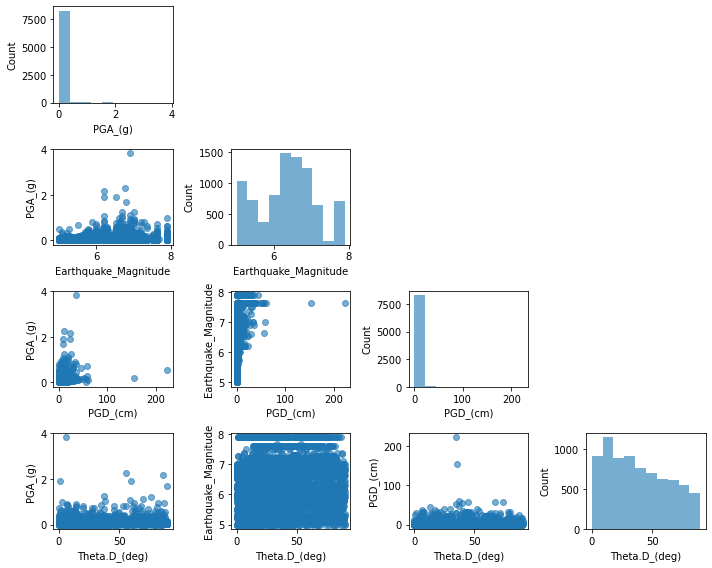

In [15]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols = ['PGA_(g)', 'Earthquake_Magnitude' ,'PGD_(cm)', 'Theta.D_(deg)']
scatterplotmatrix(df[cols].values, figsize =(10,8) , names = cols , alpha =0.6)
plt.tight_layout()
plt.show()

In [16]:
final.replace([np.inf, -np.inf], np.nan, inplace=True)

In [17]:
def clean_dataset(final):
    assert isinstance(final, pd.DataFrame), "df needs to be a pd.DataFrame"
    final.dropna(inplace=True)
    indices_to_keep = ~final.isin([np.nan, np.inf, -np.inf,]).any(1)
    return final[indices_to_keep].astype(np.float64)

final.fillna(-999, inplace=True)

In [18]:
final

,Earthquake_Magnitude,Strike_(deg),Dip_(deg),Rake_Angle_(deg),Fault_Rupture_Width_(km),Fault_Rupture_Length_for_Calculation_of_Ry_(km),Depth_to_Top_Of_Fault_Rupture_Model,Fault_Rupture_Area_(km^2),Hypocenter_Depth_(km),EpiD_(km),...,Joyner-Boore_Dist_(km),Vs30_(m/s)_selected_for_analysis,PGA_(g),PGV_(cm/sec),PGD_(cm),Theta.D_(deg),B,C,D,E
0,6.00,268.0,75.0,160.0,4.2,16.2,1.9740,68.1,6.000,6.31,...,2.07,593.35,0.099100,8.75000,3.78000,29.94,0,1,0,0
1,6.00,268.0,75.0,160.0,7.9,15.3,2.0390,120.0,6.000,6.31,...,2.09,551.82,0.012800,0.27100,0.02740,29.94,1,0,0,0
2,5.80,196.2,90.0,0.0,8.3,8.9,6.4490,74.3,10.000,73.49,...,71.28,219.31,0.014400,1.46000,0.15800,58.04,0,0,1,0
3,5.00,205.5,90.0,0.0,3.8,2.2,13.0820,8.4,16.000,33.20,...,32.44,213.44,0.014400,0.30500,0.02640,43.74,0,0,1,0
4,5.50,35.0,90.0,0.0,5.7,4.4,9.5070,25.0,10.000,54.88,...,52.73,219.31,0.033600,1.55000,0.27500,20.83,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20153,5.45,323.0,87.0,-180.0,5.6,5.7,4.2552,31.8,7.486,635.57,...,633.60,465.00,0.000016,0.00560,0.00693,-999.00,0,0,0,0
20154,5.45,323.0,87.0,-180.0,5.6,5.7,4.2552,31.8,7.486,299.30,...,297.26,634.69,0.000099,0.03060,0.02240,-999.00,0,0,0,0
20155,5.45,323.0,87.0,-180.0,5.6,5.7,4.2552,31.8,7.486,614.61,...,612.52,704.10,0.000014,0.00487,0.00583,-999.00,0,0,0,0
20156,5.45,323.0,87.0,-180.0,5.6,5.7,4.2552,31.8,7.486,551.49,...,549.27,355.87,0.000019,0.00534,0.00846,-999.00,0,0,0,0


In [19]:
y = final['Theta.D_(deg)']
x = final.drop(['Theta.D_(deg)'],axis = 1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

print("The shape of x train:", x_train.shape)
print("The shape of x test:", x_test.shape)
print("The shape of y train:", y_train.shape)
print("The shape of y test:", y_test.shape)

Shape of x: (8495, 20)
Shape of y: (8495,)
The shape of x train: (6796, 20)
The shape of x test: (1699, 20)
The shape of y train: (6796,)
The shape of y test: (1699,)


In [20]:

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.5,max_iter=3000,tol=0.5)
ridge_reg.fit(x_train.values,y_train.values)

Ridge(alpha=1.5, max_iter=3000, tol=0.5)

In [21]:
ridge_reg.score(x_test.values,y_test.values)

0.39394057475199284

In [22]:
ridge_reg.score(x_train.values,y_train.values)

0.3993810508165754

In [23]:
pred2 = ridge_reg.predict(x_test.values)

In [24]:
pred2

array([   9.39666893, -663.42120435,  -68.87314791, ...,   15.02528178,
        -37.53941742,  264.20514328])

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
print(mean_squared_error(y_test, pred2))  

61723.780575562094


In [45]:
prediction = ridge_reg.predict((np.array([[17.78, 78.98, 78, -180, 8.3, 8.9, 28.980, 74.3, 2, 73.49, 45.17, 71.28, 219.31,1.4422E-02, 1.4569E+00, 1.5790E-01, 1, 0, 0, 0]])))
print(prediction)

[3021.01197805]


In [28]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1.5, max_iter=3000, tol=0.5)
lasso_reg.fit(x_train.values,y_train.values)

Lasso(alpha=1.5, max_iter=3000, tol=0.5)

In [29]:
lasso_reg.score(x_test.values,y_test.values)

0.3610264426310743

In [30]:
lasso_reg.score(x_train.values,y_train.values)

0.37219300088321416

In [31]:
pred3 = lasso_reg.predict(x_test.values)

In [32]:
print(mean_squared_error(y_test, pred3))  

65075.90181026657


In [33]:
pred3

array([  39.63057669, -641.2333687 ,  -43.34199092, ...,   10.56171699,
        -16.24794449,  190.71536572])

In [39]:
prediction = lasso_reg.predict((np.array([[17.78, 17.98, 78, -180, 8.3, 8.9, 28.980, 74.3, 2, 98.49, 45.17, 16.28, 219.31,1.4422E-02, 1.4569E+00, 1.5790E-01, 0, 0, 1, 0]])))
print(prediction)

[2929.42512392]
